In [2]:
import xarray as xr

import datetime as dt

In [3]:
ds = xr.open_dataset('https://opendap.nccs.nasa.gov/dods/gmao/geos-cf/assim/aqc_tavg_1hr_g1440x721_v1')

c:\Users\ATMal\Documents\2021fall\NASA-GEOS\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [4]:
ds.time

<xarray.DataArray 'time' (time: 33900)>
array(['2018-01-01T00:30:00.000000000', '2018-01-01T01:30:00.000000000',
       '2018-01-01T02:30:00.000000000', ..., '2021-11-13T09:30:00.000000000',
       '2021-11-13T10:30:00.000000000', '2021-11-13T11:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01T00:30:00 ... 2021-11-13T11:30:00
Attributes:
    grads_dim:      t
    grads_mapping:  linear
    grads_size:     33900
    grads_min:      00:30z01jan2018
    grads_step:     60mn
    long_name:      time
    minimum:        00:30z01jan2018
    maximum:        11:30z13nov2021
    resolution:     0.041666668

In [9]:
# dates = [dt.datetime(2018, 7, 4), dt.datetime(2019, 1, 2), dt.datetime(2019, 2, 7), dt.datetime(2019, 2, 21), dt.datetime(2019, 3, 11)]
dates = [dt.datetime(2020, 2, 27)]

In [10]:
# current_date = dt.datetime(2018, 1, 1)
# end_date = dt.datetime(2019, 1, 1)
increment = dt.timedelta(days=1)
# while current_date < end_date:
for date in dates:
    print("working on", date)
    no2 = ds['no2'].sel(time=slice(date, date + increment)).copy()
    no2.to_netcdf(r"D:atmo-chem/data/NO2_" + str(date)[:10] + ".nc4")


working on 2020-02-27 00:00:00


c:\Users\ATMal\Documents\2021fall\NASA-GEOS\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [7]:
import numpy as np
darr = no2[:, 0, :, :].to_numpy()  # remove elev and species dimensions
flattened = darr.reshape((darr.shape[0], darr.shape[1] * darr.shape[2])).T  # flatten image


In [8]:
np.sum(np.array(flattened), axis=0)  # should not be 0

array([0.00034887, 0.00034966, 0.00033826, 0.00032278, 0.00030532,
       0.00029046, 0.00027913, 0.00027491, 0.00027889, 0.0002851 ,
       0.00028942, 0.00029496, 0.00030586, 0.00031621, 0.00032132,
       0.00032309, 0.00032508, 0.00032736, 0.00032782, 0.00032705,
       0.00032585, 0.00032681, 0.00033272, 0.00034082], dtype=float32)

In [27]:
no2[12] = (no2[13] + no2[11]) / 2

In [29]:
np.isnan(np.sum(np.array(flattened), axis=0))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [30]:
no2.to_netcdf(r"D:atmo-chem/data/NO2_" + str(date)[:10] + ".nc4")

c:\Users\ATMal\Documents\2021fall\NASA-GEOS\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [6]:
current_date = dt.datetime(2020, 2, 28)
end_date = dt.datetime(2020, 3, 16)
increment = dt.timedelta(days=1)
while current_date < end_date:
    print("working on", current_date)
    next_date = current_date + increment
    no2 = ds['no2'].sel(time=slice(current_date, next_date)).copy()
    no2.to_netcdf(r"D:atmo-chem/data/NO2_" + str(current_date)[:10] + ".nc4")
    current_date = next_date

working on 2020-02-28 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-02-29 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-01 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-02 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-03 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-04 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-05 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-06 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-07 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-08 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-09 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-10 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-11 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-12 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-13 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-14 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


working on 2020-03-15 00:00:00


c:\users\atmal\documents\2021fall\nasa-geos\.venv\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [18]:
ds

<xarray.Dataset>
Dimensions:        (time: 33204, lev: 1, lat: 721, lon: 1440)
Coordinates:
  * time           (time) datetime64[ns] 2018-01-01T00:30:00 ... 2021-10-15T1...
  * lev            (lev) float64 72.0
  * lat            (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon            (lon) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    so2            (time, lev, lat, lon) float32 ...
    pm25_rh35_gcc  (time, lev, lat, lon) float32 ...
    co             (time, lev, lat, lon) float32 ...
    no2            (time, lev, lat, lon) float32 ...
    o3             (time, lev, lat, lon) float32 ...
Attributes:
    title:                GEOS CF (Composition Forecast)
    Conventions:          COARDS\nGrADS
    dataType:             Grid
    history:              Sat Oct 16 14:03:52 EDT 2021 : imported by GrADS Da...
    extra_das_attribute:  This is an example of metadata added using a supple...

In [36]:
import netCDF4
import pandas as pd
import numpy as np

In [44]:
data = xr.open_dataset(r"D:atmo-chem/data/NO2_" + str(current_date)[:10] + ".nc4")
darr = data.to_array()
darr = darr[0, :, 0, :, :]

In [52]:
darr

<xarray.DataArray (time: 24, lat: 721, lon: 1440)>
array([[[1.1169095e-12, 1.1169095e-12, 1.1169095e-12, ...,
         1.1169095e-12, 1.1169095e-12, 1.1169095e-12],
        [1.0920405e-12, 1.0920405e-12, 1.0920405e-12, ...,
         1.0920405e-12, 1.0920405e-12, 1.0920405e-12],
        [1.0458552e-12, 1.0458552e-12, 1.0458552e-12, ...,
         1.0458552e-12, 1.0458552e-12, 1.0458552e-12],
        ...,
        [4.3196809e-12, 4.3196809e-12, 4.3267863e-12, ...,
         4.3054700e-12, 4.3054700e-12, 4.3125755e-12],
        [4.2059941e-12, 4.2130995e-12, 4.2130995e-12, ...,
         4.1988886e-12, 4.2059941e-12, 4.2059941e-12],
        [4.5470546e-12, 4.5470546e-12, 4.5470546e-12, ...,
         4.5470546e-12, 4.5470546e-12, 4.5470546e-12]],

       [[1.1002569e-12, 1.1002569e-12, 1.1002569e-12, ...,
         1.1002569e-12, 1.1002569e-12, 1.1002569e-12],
        [1.0913751e-12, 1.0913751e-12, 1.0913751e-12, ...,
         1.0913751e-12, 1.0913751e-12, 1.0913751e-12],
        [1.0522953e-12, 1.0540717e-12, 1.0540717e-12, ...,
         1.0522953e-12, 1.0522953e-12, 1.0522953e-12],
...
        [2.9648161e-12, 2.9648161e-12, 2.9648161e-12, ...,
         2.9612634e-12, 2.9612634e-12, 2.9648161e-12],
        [3.8885219e-12, 3.8885219e-12, 3.8885219e-12, ...,
         3.8956273e-12, 3.8956273e-12, 3.8885219e-12],
        [5.7927764e-12, 5.7927764e-12, 5.7927764e-12, ...,
         5.7927764e-12, 5.7927764e-12, 5.7927764e-12]],

       [[9.5305903e-13, 9.5305903e-13, 9.5305903e-13, ...,
         9.5305903e-13, 9.5305903e-13, 9.5305903e-13],
        [9.3707182e-13, 9.3796000e-13, 9.3796000e-13, ...,
         9.3707182e-13, 9.3707182e-13, 9.3707182e-13],
        [8.9443925e-13, 8.9443925e-13, 8.9532743e-13, ...,
         8.9355108e-13, 8.9355108e-13, 8.9443925e-13],
        ...,
        [3.2143613e-12, 3.2143613e-12, 3.2143613e-12, ...,
         3.2143613e-12, 3.2143613e-12, 3.2143613e-12],
        [4.1416198e-12, 4.1416198e-12, 4.1416198e-12, ...,
         4.1487252e-12, 4.1487252e-12, 4.1487252e-12],
        [6.1240340e-12, 6.1240340e-12, 6.1240340e-12, ...,
         6.1240340e-12, 6.1240340e-12, 6.1240340e-12]]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2019-01-01T00:30:00 ... 2019-01-01T23:30:00
    lev       float64 72.0
  * lat       (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon       (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
    variable  <U3 'no2'

In [71]:
current_date = dt.datetime(2019, 1, 1)
end_date = dt.datetime(2019, 1, 10)
increment = dt.timedelta(days=1)
arr = None

In [72]:
while current_date < end_date:
    print("working on", current_date)
    data = xr.open_dataset(r"D:atmo-chem/data/NO2_" + str(current_date)[:10] + ".nc4")
    darr = data.to_array()
    if arr is None:
        arr = darr[0, :, 0, :, :]
    else:
        arr = xr.concat([arr, darr[0, :, 0, :, :]], dim="time")
    del darr
    next_date = current_date + increment
    current_date = next_date

working on 2019-01-01 00:00:00
working on 2019-01-02 00:00:00
working on 2019-01-03 00:00:00
working on 2019-01-04 00:00:00
working on 2019-01-05 00:00:00
working on 2019-01-06 00:00:00
working on 2019-01-07 00:00:00
working on 2019-01-08 00:00:00
working on 2019-01-09 00:00:00


In [74]:
!pip install seaborn

  Using cached matplotlib-3.4.3-cp38-cp38-win_amd64.whl (7.1 MB)
  Using cached kiwisolver-1.3.2-cp38-cp38-win_amd64.whl (52 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [76]:
import matplotlib.pyplot as plt

In [82]:
arr.dims

('time', 'lat', 'lon')

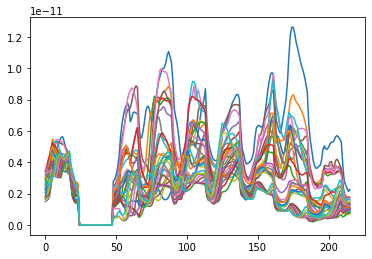

In [89]:
plt.plot(arr[:, 360, :30])

In [91]:
arr[25:45].sum()

<xarray.DataArray ()>
array(0., dtype=float32)
Coordinates:
    lev       float64 72.0
    variable  <U3 'no2'